In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer 

In [60]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

### Read dataframe

In [34]:
heart_disease_df = pd.read_csv('./data/heart_disease_df_1.csv')
heart_disease_cleaned = pd.read_csv('./data/heart_disease_cleaned_2.csv')

In [20]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0
2,70,1,0.0,145,174.0,0,1.0,125,1,NaN,0,0,3,0
3,61,1,0.0,148,203.0,0,1.0,161,0,NaN,2,1,3,0
4,62,0,0.0,138,294.0,1,1.0,106,0,NaN,1,3,2,0


In [21]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thalach   1076 non-null   int64  
 8   exang     1076 non-null   int64  
 9   oldpeak   0 non-null      float64
 10  slope     1076 non-null   int64  
 11  ca        1076 non-null   int64  
 12  thal      1076 non-null   int64  
 13  target    1076 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 117.8 KB


In [22]:
heart_disease_df.target.value_counts()

target
1    551
0    525
Name: count, dtype: int64

### Check null values

In [23]:
heart_disease_df['oldpeak'].isnull().all()

True

### Check the distribution

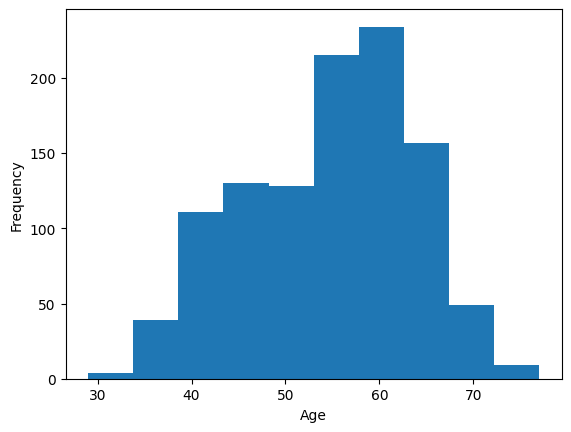

In [24]:
heart_disease_df.age.plot(kind='hist')
plt.xlabel('Age') 
plt.ylabel('Frequency')
plt.show()

## Data preparation

In [25]:
heart_disease_df.oldpeak.isnull().sum()

1076

In [26]:
# Drop empty column(s) and row(s) 
columns_dropped = heart_disease_df.drop(['oldpeak'], axis='columns') 
rows_and_columns_dropped = columns_dropped.dropna(how='all')

### Imputation

In [27]:
# Calculate the mean cholestrol value  
mean_value = heart_disease_df['chol'].mean() 
# Fill missing cholestrol values with the mean 
heart_disease_df['chol'] = heart_disease_df['chol'].fillna(mean_value) 

### Advanced imputation

In [28]:
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0
2,70,1,0.0,145,174.0,0,1.0,125,1,NaN,0,0,3,0
3,61,1,0.0,148,203.0,0,1.0,161,0,NaN,2,1,3,0
4,62,0,0.0,138,294.0,1,1.0,106,0,NaN,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,51,0,2.0,130,256.0,0,0.0,149,0,NaN,2,0,2,1
1072,54,0,NaN,160,201.0,0,1.0,163,0,NaN,2,1,2,1
1073,59,1,2.0,126,218.0,1,1.0,134,0,NaN,1,1,1,0
1074,58,0,1.0,136,319.0,1,0.0,152,0,NaN,2,2,2,0


In [29]:
heart_disease_df_imputed = heart_disease_df.copy(deep=False)

In [30]:
# Initialize KNNImputer 
imputer = KNNImputer(n_neighbors=2, weights="uniform") 
# Perform the imputation on your DataFrame 
heart_disease_df_imputed.iloc[:,2:3] = imputer.fit_transform(heart_disease_df.iloc[:,2:3])

In [31]:
heart_disease_df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.000000,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.000000,140,203.0,1,0.0,155,1,NaN,0,0,3,0
2,70,1,0.000000,145,174.0,0,1.0,125,1,NaN,0,0,3,0
3,61,1,0.000000,148,203.0,0,1.0,161,0,NaN,2,1,3,0
4,62,0,0.000000,138,294.0,1,1.0,106,0,NaN,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,51,0,2.000000,130,256.0,0,0.0,149,0,NaN,2,0,2,1
1072,54,0,0.947214,160,201.0,0,1.0,163,0,NaN,2,1,2,1
1073,59,1,2.000000,126,218.0,1,1.0,134,0,NaN,1,1,1,0
1074,58,0,1.000000,136,319.0,1,0.0,152,0,NaN,2,2,2,0


### drop duplicates

In [32]:
# Drop duplicate rows 
heart_disease_duplicates_dropped = rows_and_columns_dropped.drop_duplicates()

## Feature Engineering

### Normalization

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer 
# Split the data 
X_train, X_test = train_test_split(heart_disease_cleaned, test_size=0.2, random_state=42) 
# Createnormalizer object, fit on training data, normalize, and transform test set 
norm = Normalizer() 
X_train_norm = norm.fit_transform(X_train) 
X_test_norm = norm.transform(X_test) 

### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler 
# Split the data 
X_train, X_test = train_test_split(heart_disease_cleaned, test_size=0.2, random_state=42) 
# # Create a scaler object and fit training data to standardize it 
sc = StandardScaler() 
X_train_stzd = sc.fit_transform(X_train) 
# Only standardize the test data 
X_test_stzd = sc.transform(X_test)

In [37]:
X_train_stzd.shape

(350, 14)

### Feature Selection

In [38]:
heart_disease_cleaned.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
heart_disease_df_X = heart_disease_cleaned.drop('target', axis='columns')
heart_disease_df_y = heart_disease_cleaned['target']

In [40]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import train_test_split  
 # Splitting data into train and test subsets first to avoid data leakage 
X_train, X_test, y_train, y_test = train_test_split(heart_disease_df_X, heart_disease_df_y, test_size=0.2, random_state=42) 


In [42]:
# Define and fit the random forest model 
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5) 
rf.fit(X_train, y_train)   
# Define and run feature selection 
model = SelectFromModel(rf, prefit=True) 
features_bool = model.get_support() 
features = heart_disease_df_X.columns[features_bool] 

In [43]:
features

Index(['cp', 'thalach', 'slope', 'ca', 'thal'], dtype='object')

## Model Training

### Modeling options
1. Logistic Regression
Finds decision boundary between classes

```
sklearn.linear_model.LogisticRegression
```

2. Support Vector Classifier
Finds plane to separate classes
```
sklearn.svm.SVC
```
3. Decision Tree
Finds simple 'rules' to classify data
```
sklearn.tree.DecisionTreeClassifier
```

4. Random Forest
Combines multiple decision trees
```
sklearn.ensemble.RandomForestClassifier
```

### Training

In [44]:
# Importing necessary libraries 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
 # Split the data into training and testing sets (80:20) 
X_train, X_test, y_train, y_test = train_test_split(heart_disease_df_X[features], heart_disease_df_y, test_size=0.2, random_state=42)   
 # Define the models 
logistic_model = LogisticRegression(max_iter=200)  
 # Train the model 
logistic_model.fit(X_train, y_train) 


LogisticRegression(max_iter=200)

In [45]:
import numpy as np

In [61]:
# Jane Doe's health data, for example: [age, cholesterol level, blood pressure, etc.] 
jane_doe_data = np.array([  0., 122.,   1.,   0.,   2.]) 
# Reshape the data to 2D, because scikit-learn expects a 2D array-like input 
jane_doe_data = jane_doe_data.reshape(1, -1)   
# Use the model to predict Jane's heart disease diagnosis probabilities 
jane_doe_probabilities = logistic_model.predict_proba(jane_doe_data) 
jane_doe_prediction = logistic_model.predict(jane_doe_data) 

In [62]:
jane_doe_prediction, jane_doe_probabilities

(array([0]), array([[0.67485168, 0.32514832]]))

### Logging

In [48]:
import mlflow

mlflow.set_tracking_uri('../../mlruns')

In [49]:
# Set an experiment name, which is a workspace for your runs 
mlflow.set_experiment("Heart Disease")

<Experiment: artifact_location=('/Users/karajaram/Documents/GitHub/DataCamp/MLOps/2. End-to-End '
 'ML/../../mlruns/349355804453482565'), creation_time=1716980396621, experiment_id='349355804453482565', last_update_time=1716980396621, lifecycle_stage='active', name='Heart Disease', tags={}>

In [ ]:
# Start a new run in this experiment 
with mlflow.start_run():     
    #Train a model, get the prediction accuracy     
    logistic_model = LogisticRegression()       
    # Log parameters, eg:     
    mlflow.log_param("penalty", logistic_model.get_params()['penalty'])

### Cross validation

In [63]:
from sklearn.model_selection import cross_val_score, KFold 
# split the data into 10 equal parts 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

# get the cross validation accuracy for a given model 
cv_results = cross_val_score(model, heart_disease_df_X,  heart_disease_df_y, cv=kfold, scoring='balanced_accuracy') 


In [65]:
cv_results

array([0.83736842, 0.95368421, 0.81473684, 0.79486486, 0.8531746 ])

In [64]:
# Hyperparameters to test 
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
# # Manually iterate over the hyperparameters 
for C in C_values:     
    model = LogisticRegression(max_iter=200, C=C)    
    model.fit(X_train, y_train)     
    accuracy = cross_val_score(model, heart_disease_df_X, heart_disease_df_y, cv=kfold, scoring='balanced_accuracy') 
    print(f"C = {C}: Bal Acc: {accuracy.mean():.4f} (+/- {accuracy.std():.4f})")

C = 0.001: Bal Acc: 0.7165 (+/- 0.0395)
C = 0.01: Bal Acc: 0.7682 (+/- 0.0367)
C = 0.1: Bal Acc: 0.8451 (+/- 0.0572)
C = 1: Bal Acc: 0.8508 (+/- 0.0551)
C = 10: Bal Acc: 0.8537 (+/- 0.0504)
C = 100: Bal Acc: 0.8473 (+/- 0.0467)
C = 1000: Bal Acc: 0.8553 (+/- 0.0500)


### Testing

In [66]:
import unittest

In [76]:
class TestModelInference(unittest.TestCase):     
    def setUp(self):         
        self.model = model         
        self.X_test = X_test       
        
    def test_prediction_output_shape(self):         
        y_pred = self.model.predict(self.X_test)         
        self.assertEqual(y_pred.shape[0], self.X_test.shape[0])

In [77]:
def test_input_values(self):         
    print("Running test_input_values test case")         
    # Get inputs (each row in testing set)         
    for input in X_test:              
        for value in input:                 
    # if value is cholestrol, for example:                 
            self.assertIn(value, [0, 500])

### Containerizatiom